In [33]:
pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import json
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib.pyplot as plt

import openpyxl

In [35]:
def merge_data(*file_paths):
    '''Combine Dataframes'''
    data_frames = [pd.read_json(file) for file in file_paths]
    combined_data = pd.concat(data_frames, ignore_index=True)
    
    return combined_data

In [36]:
user_data = merge_data(
    'sleepData.json',
    'sleepData.json',
)

user_data['sleepStartTimestampGMT'] = pd.to_datetime(user_data['sleepStartTimestampGMT'])
user_data['sleepEndTimestampGMT'] = pd.to_datetime(user_data['sleepEndTimestampGMT'])
user_data['diff_seconds'] = (user_data['sleepEndTimestampGMT'] - user_data['sleepStartTimestampGMT']).dt.seconds
user_data['diff_hours'] = round((user_data['sleepEndTimestampGMT'] - user_data['sleepStartTimestampGMT']).dt.seconds / 3600, 4)

user_data.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,retro,awakeCount,avgSleepStress,sleepScores,restlessMomentCount,diff_seconds,diff_hours
0,2024-03-15 21:12:00,2024-03-16 04:48:00,2024-03-16,ENHANCED_CONFIRMED_FINAL,4500,16380,5400.0,1080,0,12,9,16,False,2,8.090000,"{'overallScore': 85, 'qualityScore': 86, 'dura...",50,27360,7.6000
1,2024-03-16 22:27:00,2024-03-17 08:03:00,2024-03-17,ENHANCED_CONFIRMED_FINAL,4980,18660,3960.0,6960,0,12,9,18,False,5,28.120001,"{'overallScore': 44, 'qualityScore': 39, 'dura...",40,34560,9.6000
2,2024-03-17 21:59:00,2024-03-18 03:38:00,2024-03-18,ENHANCED_CONFIRMED_FINAL,5280,9960,3300.0,1800,0,13,11,16,False,2,22.580000,"{'overallScore': 63, 'qualityScore': 75, 'dura...",29,20340,5.6500
3,2024-03-18 21:08:00,2024-03-19 04:05:00,2024-03-19,ENHANCED_CONFIRMED_FINAL,7740,10020,5940.0,1320,0,12,10,16,False,1,24.700001,"{'overallScore': 74, 'qualityScore': 81, 'dura...",36,25020,6.9500
4,2024-03-19 21:30:00,2024-03-20 03:16:00,2024-03-20,ENHANCED_CONFIRMED_FINAL,8880,6300,5580.0,0,0,12,10,15,False,0,17.410000,"{'overallScore': 74, 'qualityScore': 91, 'dura...",26,20760,5.7667


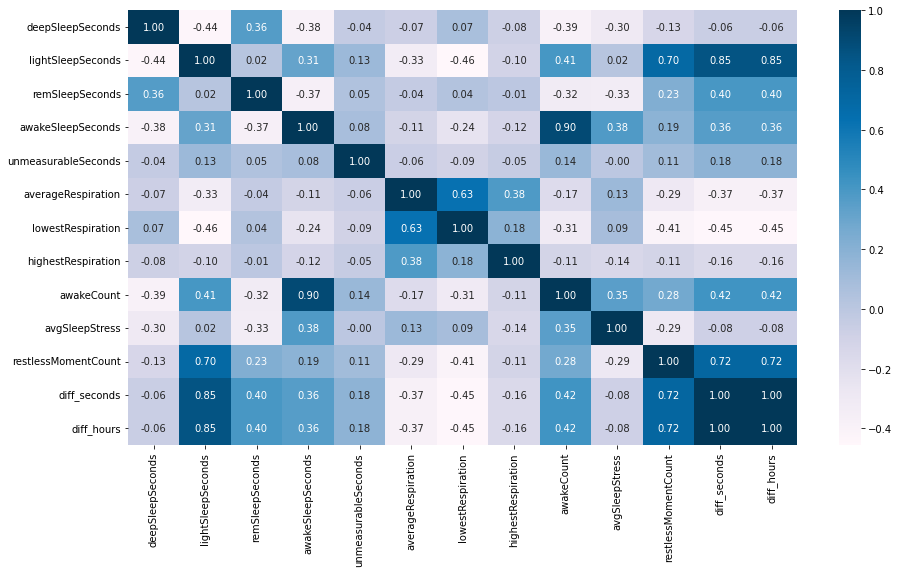

In [37]:
numeric_columns = user_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt=".2f")

plt.savefig("heatmap_1.jpg", format='jpg', dpi=300)

plt.show()

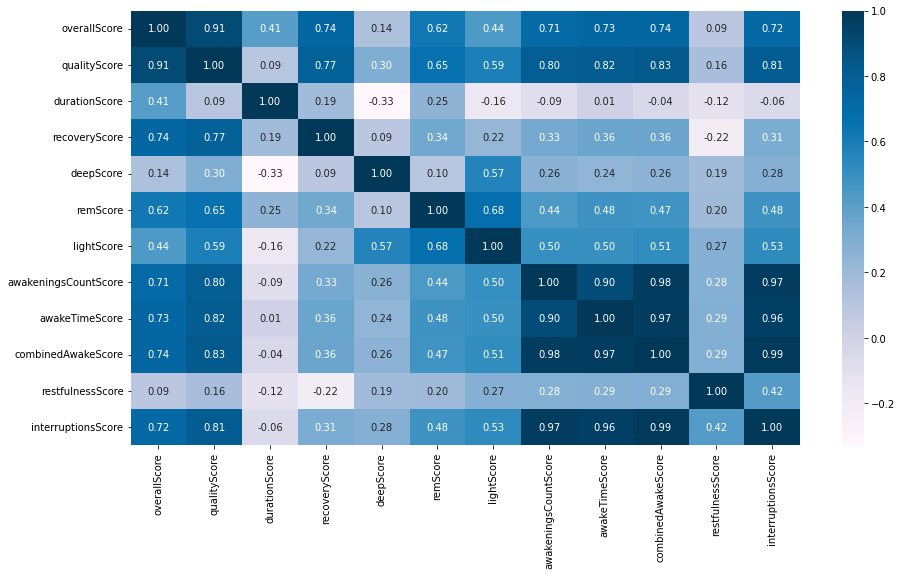

In [38]:
numeric_columns = pd.json_normalize(user_data['sleepScores']).select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt=".2f")

plt.savefig("heatmap_2.jpg", format='jpg', dpi=300)

plt.show()

In [39]:
result_df = pd.concat([user_data, pd.json_normalize(user_data['sleepScores'])], axis=1)
result_df.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,...,deepScore,remScore,lightScore,awakeningsCountScore,awakeTimeScore,combinedAwakeScore,restfulnessScore,interruptionsScore,feedback,insight
0,2024-03-15 21:12:00,2024-03-16 04:48:00,2024-03-16,ENHANCED_CONFIRMED_FINAL,4500,16380,5400.0,1080,0,12,...,86,79,83,74,83,78,70,76,POSITIVE_LONG_AND_RECOVERING,NONE
1,2024-03-16 22:27:00,2024-03-17 08:03:00,2024-03-17,ENHANCED_CONFIRMED_FINAL,4980,18660,3960.0,6960,0,12,...,90,67,75,0,0,0,83,16,NEGATIVE_LONG_BUT_NOT_RESTORATIVE,NEGATIVE_STRESSFUL_DAY
2,2024-03-17 21:59:00,2024-03-18 03:38:00,2024-03-18,ENHANCED_CONFIRMED_FINAL,5280,9960,3300.0,1800,0,13,...,100,74,99,74,70,72,79,74,POSITIVE_SHORT_BUT_DEEP,NONE
3,2024-03-18 21:08:00,2024-03-19 04:05:00,2024-03-19,ENHANCED_CONFIRMED_FINAL,7740,10020,5940.0,1320,0,12,...,100,100,99,87,78,82,80,82,POSITIVE_DEEP,POSITIVE_STRESSFUL_DAY
4,2024-03-19 21:30:00,2024-03-20 03:16:00,2024-03-20,ENHANCED_CONFIRMED_FINAL,8880,6300,5580.0,0,0,12,...,100,100,81,100,100,100,90,98,POSITIVE_DEEP,NONE


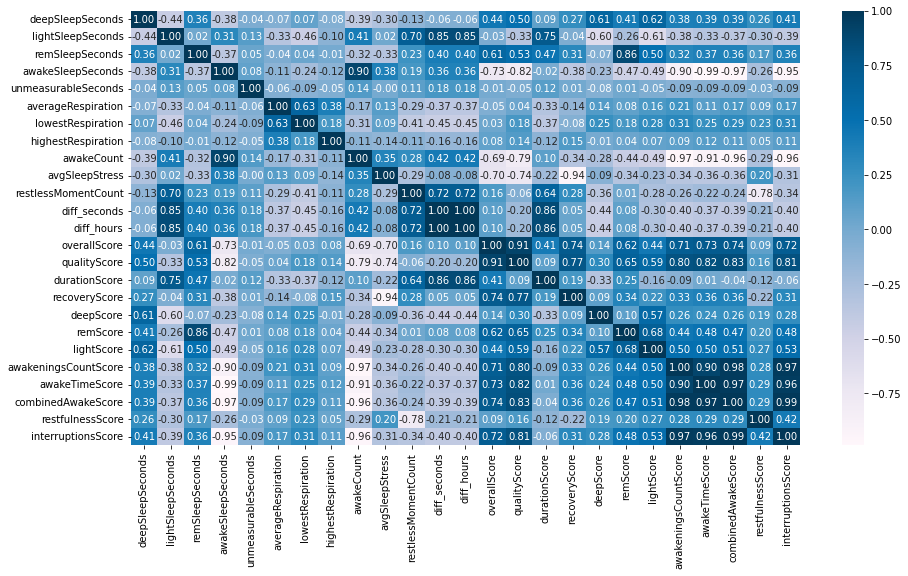

In [40]:
numeric_columns = result_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt=".2f")

plt.savefig("heatmap_3.jpg", format='jpg', dpi=300)

plt.show()

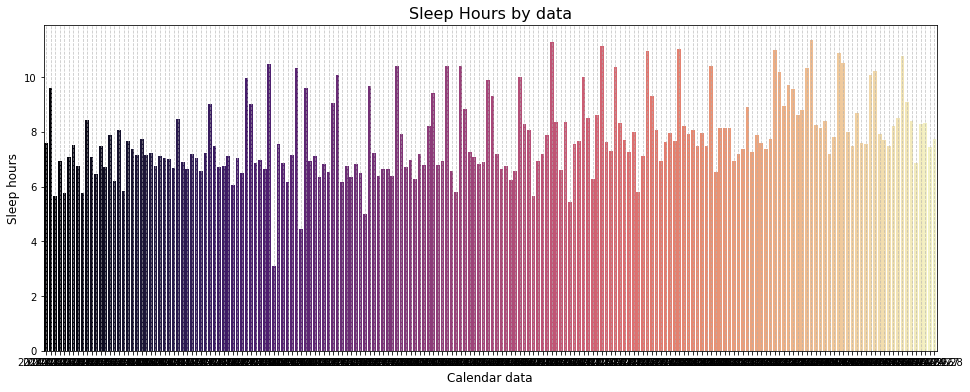

In [41]:
plt.figure(figsize=(16, 6))
sns.barplot(x=user_data['calendarDate'], y=user_data['diff_hours'], palette='magma')

plt.title('Sleep Hours by data', fontsize=16)
plt.xlabel('Calendar data', fontsize=12)
plt.ylabel('Sleep hours', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("sleep_hours_by_data.jpg", format='jpg', dpi=300)

plt.show()

In [42]:
user_data['calendar_day'] = pd.to_datetime(user_data['calendarDate'], dayfirst=True)

user_data['week_number'] = user_data['calendar_day'].dt.isocalendar().week
       
user_data = user_data.drop(['calendarDate', 'sleepWindowConfirmationType', 'sleepStartTimestampGMT',
                            'sleepEndTimestampGMT', 'unmeasurableSeconds', 'averageRespiration',
                            'lowestRespiration', 'highestRespiration', 'retro', 'sleepScores'], axis=1)

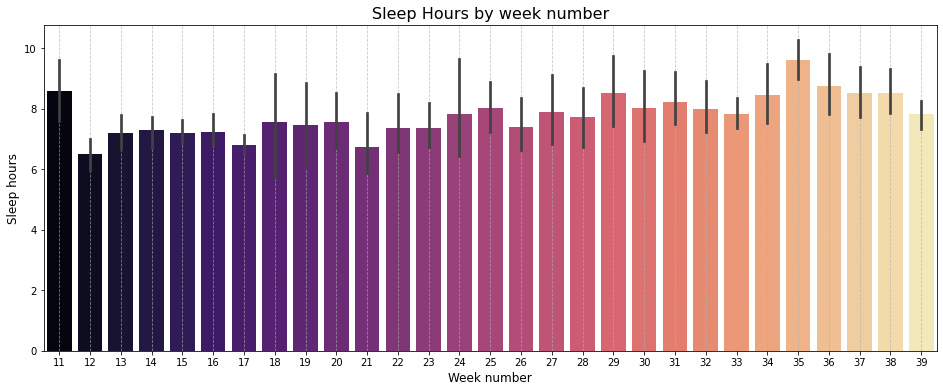

In [43]:
plt.figure(figsize=(16, 6))
sns.barplot(x=user_data['week_number'], y=user_data['diff_hours'], palette='magma')

plt.title('Sleep Hours by week number', fontsize=16)
plt.xlabel('Week number', fontsize=12)
plt.ylabel('Sleep hours', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig("sleep_hours_by_week_numbers.jpg", format='jpg', dpi=300)

plt.show()

In [44]:
user_data_avg_sleep_hours = user_data.groupby('week_number').agg({'diff_hours':'mean'}).reset_index()
user_data_avg_sleep_hours.head()

,week_number,diff_hours
0,11,8.600000
1,12,6.497629
2,13,7.180943
3,14,7.292857
4,15,7.188100


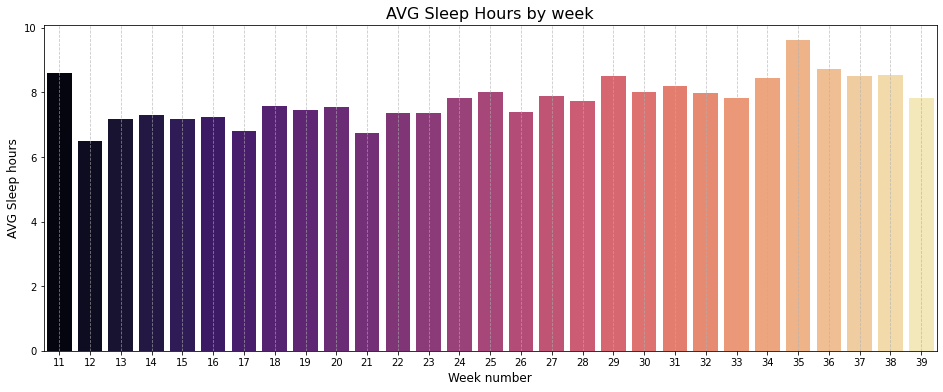

In [45]:
plt.figure(figsize=(16, 6))
sns.barplot(x=user_data_avg_sleep_hours['week_number'], y=user_data_avg_sleep_hours['diff_hours'], palette='magma')

plt.title('AVG Sleep Hours by week', fontsize=16)
plt.xlabel('Week number', fontsize=12)
plt.ylabel('AVG Sleep hours', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

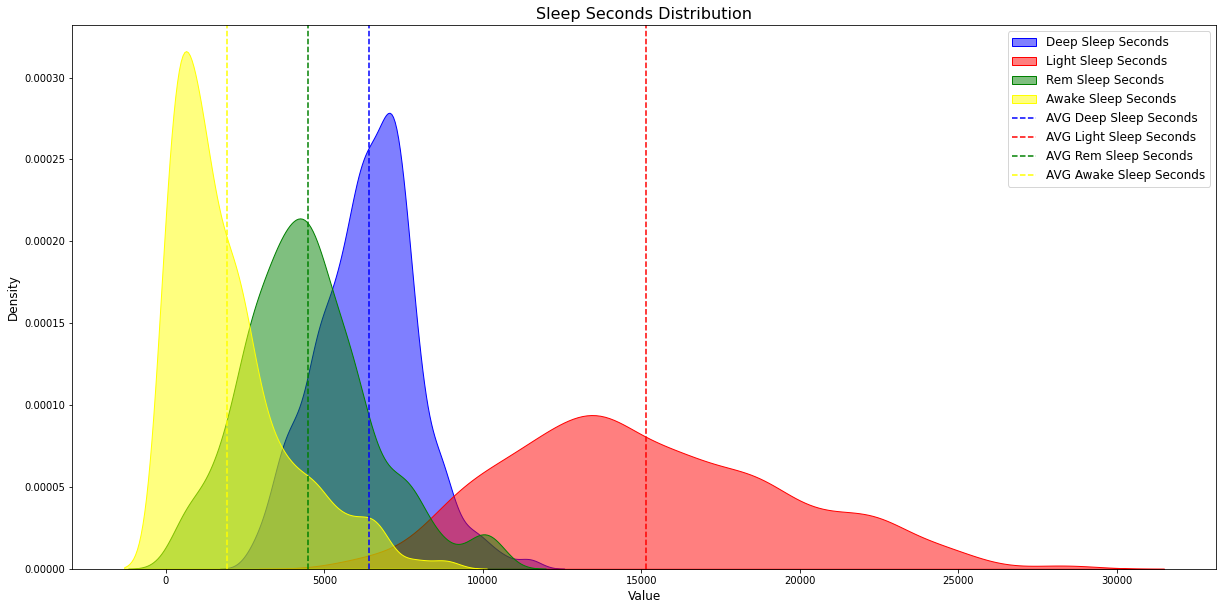

In [46]:
plt.figure(figsize=(20.5, 10))

sns.kdeplot(user_data['deepSleepSeconds'], fill=True, label='Deep Sleep Seconds', color='blue', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(user_data['lightSleepSeconds'], fill=True, label='Light Sleep Seconds', color='red', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(user_data['remSleepSeconds'], fill=True, label='Rem Sleep Seconds', color='green', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(user_data['awakeSleepSeconds'], fill=True, label='Awake Sleep Seconds', color='yellow', alpha=0.5, bw_adjust=0.7)

plt.axvline(user_data['deepSleepSeconds'].mean(), color='blue', linestyle='--', label='AVG Deep Sleep Seconds')
plt.axvline(user_data['lightSleepSeconds'].mean(), color='red', linestyle='--', label='AVG Light Sleep Seconds')
plt.axvline(user_data['remSleepSeconds'].mean(), color='green', linestyle='--', label='AVG Rem Sleep Seconds')
plt.axvline(user_data['awakeSleepSeconds'].mean(), color='yellow', linestyle='--', label='AVG Awake Sleep Seconds')

plt.title('Sleep Seconds Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend(fontsize=12)

plt.grid(False)

plt.savefig("sleep_seconds_distribution.jpg", format='jpg', dpi=300)

plt.show()

In [47]:
sport_data = merge_data(
    'MetricsMaxMetData.json',
    'MetricsMaxMetData.json',
)

sport_data['calendar_day'] = pd.to_datetime(sport_data['calendarDate'], dayfirst=True)

sport_data['calendar_day'] = pd.to_datetime(sport_data['calendar_day']).dt.date

sport_data_clean = sport_data.drop(['userProfilePK', 'deviceId', 'maxMetCategory', 'calibratedData', 'calendarDate'], axis=1)
sport_data_clean.head()

,updateTimestamp,vo2MaxValue,maxMet,sport,subSport,calendar_day
0,2024-03-16T22:59:49.0,30,8.685867,NaN,NaN,2024-03-17
1,2024-03-17T08:39:49.0,29,8.226791,NaN,NaN,2024-03-17
2,2024-03-22T23:00:18.0,29,8.248947,NaN,NaN,2024-03-23
3,2024-03-23T06:45:18.0,29,8.208832,NaN,NaN,2024-03-23
4,2024-03-23T23:00:18.0,29,8.240082,NaN,NaN,2024-03-24


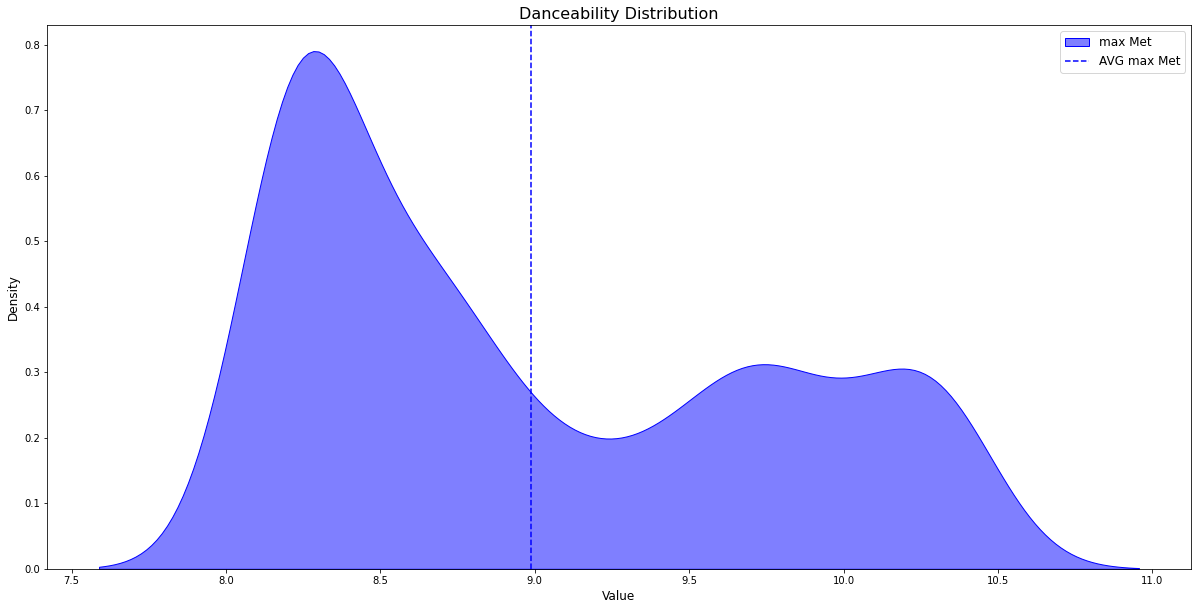

In [48]:
plt.figure(figsize=(20.5, 10))

sns.kdeplot(sport_data_clean['maxMet'], fill=True, label='max Met', color='blue', alpha=0.5, bw_adjust=0.7)

plt.axvline(sport_data_clean['maxMet'].mean(), color='blue', linestyle='--', label='AVG max Met')

plt.title('Danceability Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend(fontsize=12)

plt.grid(False)

plt.show()

In [49]:
walk_data = merge_data(
    'UDSFile.json',
    'UDSFile.json',
)

walk_data.head()

,userProfilePK,calendarDate,uuid,durationInMilliseconds,totalKilocalories,activeKilocalories,bmrKilocalories,wellnessKilocalories,remainingKilocalories,wellnessTotalKilocalories,...,includesSleepPulseOx,source,allDayStress,bodyBattery,minAvgHeartRate,maxAvgHeartRate,version,respiration,restingCaloriesFromActivity,hydration
0,120971652,2024-03-15,698fa4e842bf4c829f886492492d1036,86400000,2298,2,2296,2298,2298,2298,...,False,0,"{'userProfilePK': 120971652, 'calendarDate': '...","{'userProfilePK': 120971652, 'calendarDate': '...",56,92,1,"{'userProfilePK': 120971652, 'calendarDate': '...",NaN,NaN
1,120971652,2024-03-16,6cb0b411416540b58aa16d783d28e844,86400000,3244,948,2296,3244,3244,3244,...,False,0,"{'userProfilePK': 120971652, 'calendarDate': '...","{'userProfilePK': 120971652, 'calendarDate': '...",50,142,2,"{'userProfilePK': 120971652, 'calendarDate': '...",NaN,NaN
2,120971652,2024-03-17,3522a1d12815420d9dce879a7ee3ba81,86400000,2657,361,2296,2657,2657,2657,...,False,0,"{'userProfilePK': 120971652, 'calendarDate': '...","{'userProfilePK': 120971652, 'calendarDate': '...",33,147,53280002,"{'userProfilePK': 120971652, 'calendarDate': '...",NaN,NaN
3,120971652,2024-03-18,5381f443a277453297d2e65fbee1f549,86400000,2710,414,2296,2710,2710,2710,...,False,0,"{'userProfilePK': 120971652, 'calendarDate': '...","{'userProfilePK': 120971652, 'calendarDate': '...",52,132,1,"{'userProfilePK': 120971652, 'calendarDate': '...",NaN,NaN
4,120971652,2024-03-19,b6c40875d0864453800139368d7a1a55,86400000,2535,239,2296,2535,2535,2535,...,False,0,"{'userProfilePK': 120971652, 'calendarDate': '...","{'userProfilePK': 120971652, 'calendarDate': '...",50,131,1,"{'userProfilePK': 120971652, 'calendarDate': '...",NaN,NaN


In [50]:
walk_data_clean = walk_data[['calendarDate', 'totalKilocalories', 'totalSteps', 'dailyStepGoal', 'totalDistanceMeters',
                                'highlyActiveSeconds', 'activeSeconds', 'minHeartRate', 'maxHeartRate', 'restingHeartRate',
                                'minAvgHeartRate', 'maxAvgHeartRate', 'currentDayRestingHeartRate']]

walk_data_clean.loc[:, 'calendarDate'] = pd.to_datetime(walk_data_clean['calendarDate'])

walk_data_clean.head()

<ipython-input-50-9de5f1731c5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walk_data_clean.loc[:, 'calendarDate'] = pd.to_datetime(walk_data_clean['calendarDate'])
<ipython-input-50-9de5f1731c5c>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  walk_data_clean.loc[:, 'calendarDate'] = pd.to_datetime(walk_data_clean['calendarDate'])


,calendarDate,totalKilocalories,totalSteps,dailyStepGoal,totalDistanceMeters,highlyActiveSeconds,activeSeconds,minHeartRate,maxHeartRate,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,currentDayRestingHeartRate
0,2024-03-15,2298,32,7500,27,0,60,56,96,57,56,92,57
1,2024-03-16,3244,5960,7500,4936,720,7377,48,150,55,50,142,52
2,2024-03-17,2657,9451,7200,7843,780,9434,33,155,51,33,147,45
3,2024-03-18,2710,7763,7430,6429,840,8590,51,142,52,52,132,55
4,2024-03-19,2535,6149,7500,5092,1170,7165,48,139,52,50,131,52


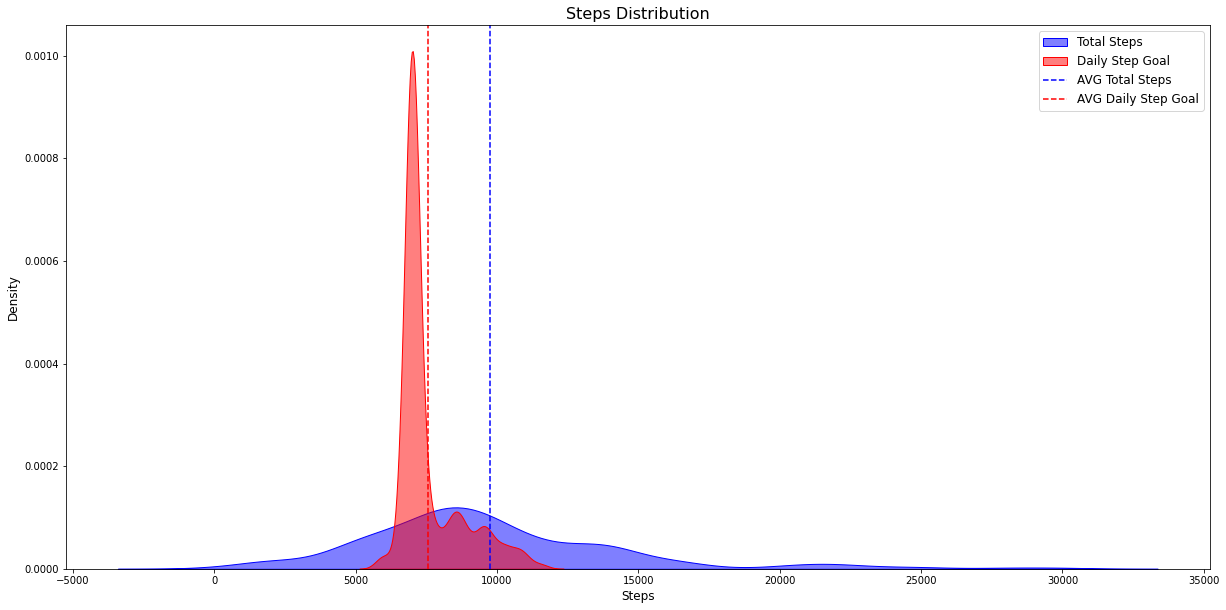

In [51]:
plt.figure(figsize=(20.5, 10))

sns.kdeplot(walk_data_clean['totalSteps'], fill=True, label='Total Steps', color='blue', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(walk_data_clean['dailyStepGoal'], fill=True, label='Daily Step Goal', color='red', alpha=0.5, bw_adjust=0.7)

plt.axvline(walk_data_clean['totalSteps'].mean(), color='blue', linestyle='--', label='AVG Total Steps')
plt.axvline(walk_data_clean['dailyStepGoal'].mean(), color='red', linestyle='--', label='AVG Daily Step Goal')

plt.title('Steps Distribution', fontsize=16)
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend(fontsize=12)

plt.grid(False)

plt.savefig("steps_distribution.jpg", format='jpg', dpi=300)

plt.show()

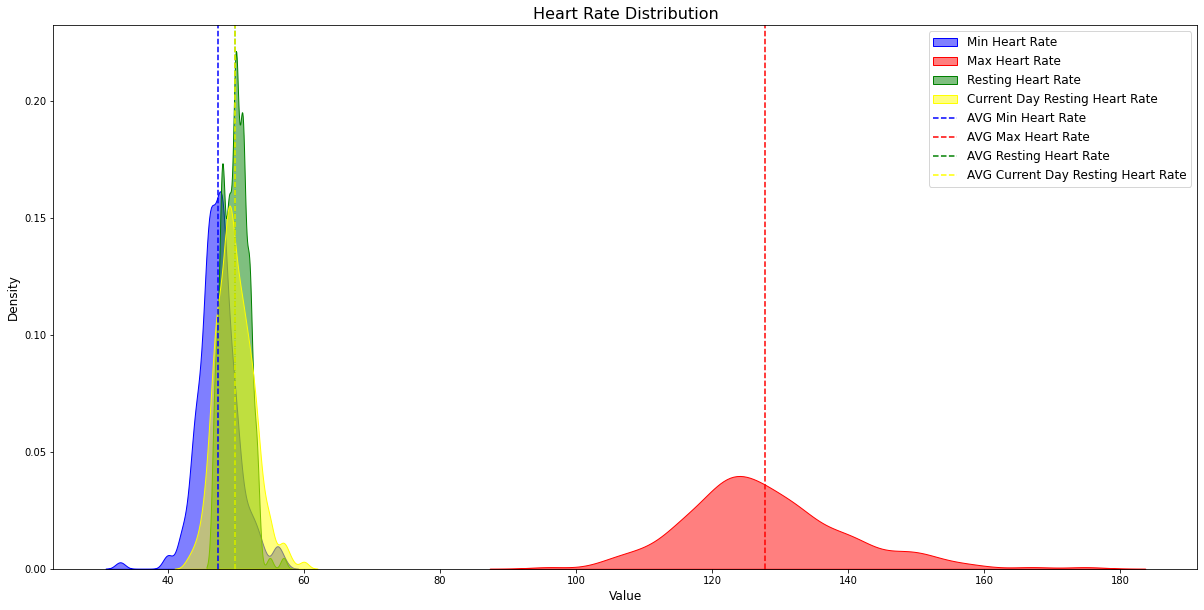

In [52]:
plt.figure(figsize=(20.5, 10))

sns.kdeplot(walk_data_clean['minHeartRate'], fill=True, label='Min Heart Rate', color='blue', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(walk_data_clean['maxHeartRate'], fill=True, label='Max Heart Rate', color='red', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(walk_data_clean['restingHeartRate'], fill=True, label='Resting Heart Rate', color='green', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(walk_data_clean['currentDayRestingHeartRate'], fill=True, label='Current Day Resting Heart Rate', color='yellow', alpha=0.5, bw_adjust=0.7)

plt.axvline(walk_data_clean['minHeartRate'].mean(), color='blue', linestyle='--', label='AVG Min Heart Rate')
plt.axvline(walk_data_clean['maxHeartRate'].mean(), color='red', linestyle='--', label='AVG Max Heart Rate')
plt.axvline(walk_data_clean['restingHeartRate'].mean(), color='green', linestyle='--', label='AVG Resting Heart Rate')
plt.axvline(walk_data_clean['currentDayRestingHeartRate'].mean(), color='yellow', linestyle='--', label='AVG Current Day Resting Heart Rate')

plt.title('Heart Rate Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend(fontsize=12)

plt.grid(False)

plt.savefig("heart_rate_distribution.jpg", format='jpg', dpi=300)

plt.show()

In [53]:
summarized_activities = pd.read_json('/data/notebook_files/garmin_data/summarizedActivities.json').head()

summarized_activities_export = pd.json_normalize(summarized_activities['summarizedActivitiesExport']).T
summarized_activities_data = pd.json_normalize(summarized_activities_export[0])
summarized_activities_data.head()

,activityId,uuidMsb,uuidLsb,name,activityType,userProfileId,timeZoneId,beginTimestamp,eventTypeId,rule,...,totalSets,totalReps,minRespirationRate,maxRespirationRate,avgRespirationRate,startStress,endStress,differenceStress,avgStress,maxStress
0,17153205254,1946612690159159462,-8156752393850197392,Belgrade Walking,walking,120971652,124,1727539324000,9,groups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17150748872,2227973672677100328,-8594936653260262996,Yoga,yoga,120971652,124,1727527270000,9,groups,...,1.0,0.0,6.51,13.83,8.93,43.0,30.0,-13.0,24.0,63.0
2,17133404320,-5043772495214982462,-6314788847008063457,Сил. трен.,strength_training,120971652,124,1727339969000,9,groups,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17128938870,-5374816328737601969,-4789608088819078985,Belgrade Walking,walking,120971652,124,1727280612000,9,groups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17126057058,-5263848465501173018,-5866095590377554046,Yoga,yoga,120971652,124,1727254099000,9,groups,...,1.0,0.0,5.92,11.69,7.38,36.0,16.0,-20.0,37.0,65.0


In [54]:
summarized_activities_data['dayetime'] = pd.to_datetime(summarized_activities_data['beginTimestamp'], unit='ms')
summarized_activities_data['date'] = pd.to_datetime(summarized_activities_data['dayetime']).dt.date

# Inch in meters
summarized_activities_data['distance_m'] = summarized_activities_data['distance'] * 0.0254

# Duration minuntes
summarized_activities_data['duration_min'] = summarized_activities_data['duration'] / 36000

In [55]:
summarized_activities_data_clean = summarized_activities_data[['activityType', 'sportType', 'avgHr', 'maxHr',
                                                               'steps', 'bmrCalories', 'vO2MaxValue', 'locationName',
                                                               'dayetime', 'distance_m', 'duration_min', 'date']].fillna(0)

summarized_activities_data_clean.head()

,activityType,sportType,avgHr,maxHr,steps,bmrCalories,vO2MaxValue,locationName,dayetime,distance_m,duration_min,date
0,walking,STEPS,109.0,131.0,10696.0,733.25350,36.0,Belgrade,2024-09-28 16:02:04,22273.386504,184.424086,2024-09-28
1,yoga,TRAINING,61.0,113.0,0.0,184.36088,0.0,0,2024-09-28 12:41:10,0.000000,53.077888,2024-09-28
2,strength_training,FITNESS_EQUIPMENT,101.0,125.0,6.0,142.46068,0.0,0,2024-09-26 08:39:29,0.000000,36.007443,2024-09-26
3,walking,STEPS,103.0,121.0,6486.0,439.95210,36.0,Belgrade,2024-09-25 16:10:12,13759.027451,111.386386,2024-09-25
4,yoga,TRAINING,66.0,92.0,0.0,150.84072,0.0,0,2024-09-25 08:48:19,0.000000,41.788028,2024-09-25


In [56]:
summarized_activities_data_clean[summarized_activities_data_clean['activityType'] == 'walking']\
                                                                                                [['activityType',\
                                                                                                'locationName',\
                                                                                                'date',\
                                                                                                'duration_min']]

summarized_activities_data_clean.head()

,activityType,sportType,avgHr,maxHr,steps,bmrCalories,vO2MaxValue,locationName,dayetime,distance_m,duration_min,date
0,walking,STEPS,109.0,131.0,10696.0,733.25350,36.0,Belgrade,2024-09-28 16:02:04,22273.386504,184.424086,2024-09-28
1,yoga,TRAINING,61.0,113.0,0.0,184.36088,0.0,0,2024-09-28 12:41:10,0.000000,53.077888,2024-09-28
2,strength_training,FITNESS_EQUIPMENT,101.0,125.0,6.0,142.46068,0.0,0,2024-09-26 08:39:29,0.000000,36.007443,2024-09-26
3,walking,STEPS,103.0,121.0,6486.0,439.95210,36.0,Belgrade,2024-09-25 16:10:12,13759.027451,111.386386,2024-09-25
4,yoga,TRAINING,66.0,92.0,0.0,150.84072,0.0,0,2024-09-25 08:48:19,0.000000,41.788028,2024-09-25


In [57]:
activ_data = summarized_activities_data_clean[['activityType', 'locationName', 'date', 'duration_min']]
activ_data.loc[:, 'date'] = pd.to_datetime(activ_data['date'])
sleep_data = user_data[['diff_hours', 'calendar_day']]
walk_data = walk_data_clean[['calendarDate', 'dailyStepGoal', 'totalSteps', 'totalDistanceMeters']]

<ipython-input-57-7b874719c2c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activ_data.loc[:, 'date'] = pd.to_datetime(activ_data['date'])
<ipython-input-57-7b874719c2c0>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  activ_data.loc[:, 'date'] = pd.to_datetime(activ_data['date'])


In [58]:
with pd.ExcelWriter('garmine_data.xlsx') as writer:
    summarized_activities_data_clean.to_excel(writer, sheet_name='summarized_activities_data', index=False)
    user_data.to_excel(writer, sheet_name='user_data', index=False)
    walk_data_clean.to_excel(writer, sheet_name='walk_data_clean', index=False)